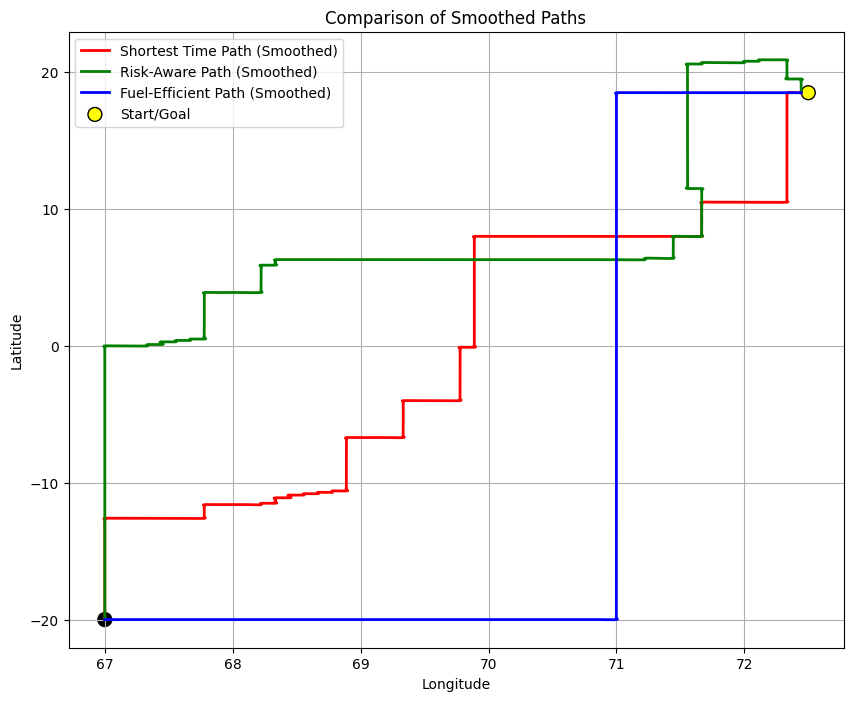

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Function to smooth paths using B-spline interpolation
def smooth_path(latitudes, longitudes):
    tck, u = splprep([longitudes, latitudes], s=0)
    u_new = np.linspace(u.min(), u.max(), len(u)*10)  # Increase the number of points
    smooth_coords = splev(u_new, tck)
    return smooth_coords[1], smooth_coords[0]  # Return latitudes, longitudes

# Function to plot paths
def plot_smoothed_paths(paths, labels, colors, start_lat, start_lon, goal_lat, goal_lon):
    plt.figure(figsize=(10, 8))
    
    for path, label, color in zip(paths, labels, colors):
        latitudes = path['Latitude'].values
        longitudes = path['Longitude'].values
        smooth_lat, smooth_lon = smooth_path(latitudes, longitudes)
        plt.plot(smooth_lon, smooth_lat, color=color, linewidth=2, label=f'{label} (Smoothed)')
    
    # Highlight start and goal points
    plt.scatter([start_lon, goal_lon], [start_lat, goal_lat],
                c=['yellow', 'black'], label='Start/Goal', s=100, edgecolors='black')

    plt.title("Comparison of Smoothed Paths")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Load paths from CSV files
path_without_risk = pd.read_csv('path_without_risk.csv')
path_with_risk = pd.read_csv('path_with_risk.csv')
path_with_fuel = pd.read_csv('path_with_fuel.csv')

# Define start and goal points
start_lat, start_lon = 18.5, 72.5
goal_lat, goal_lon = -20, 67

# Plot the smoothed paths
plot_smoothed_paths(
    [path_without_risk, path_with_risk, path_with_fuel],
    ['Shortest Time Path', 'Risk-Aware Path', 'Fuel-Efficient Path'],
    ['red', 'green', 'blue'],
    start_lat, start_lon, goal_lat, goal_lon
)


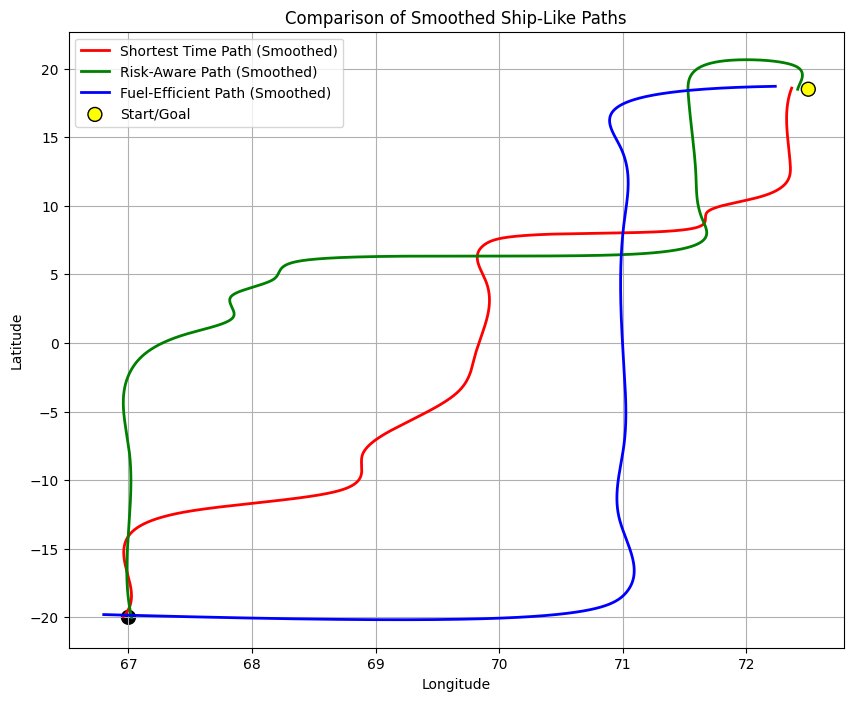

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Function to smooth paths with enhanced smoothing
def smooth_path(latitudes, longitudes, smoothing_factor=5, num_points_multiplier=50):
    tck, u = splprep([longitudes, latitudes], s=smoothing_factor)
    u_new = np.linspace(u.min(), u.max(), len(u)*num_points_multiplier)  # Generate more points
    smooth_coords = splev(u_new, tck)
    return smooth_coords[1], smooth_coords[0]  # Return latitudes, longitudes

# Function to plot smoothed paths
def plot_smoothed_paths(paths, labels, colors, start_lat, start_lon, goal_lat, goal_lon):
    plt.figure(figsize=(10, 8))
    
    for path, label, color in zip(paths, labels, colors):
        latitudes = path['Latitude'].values
        longitudes = path['Longitude'].values
        smooth_lat, smooth_lon = smooth_path(latitudes, longitudes)
        plt.plot(smooth_lon, smooth_lat, color=color, linewidth=2, label=f'{label} (Smoothed)')
    
    # Highlight start and goal points
    plt.scatter([start_lon, goal_lon], [start_lat, goal_lat],
                c=['yellow', 'black'], label='Start/Goal', s=100, edgecolors='black')

    plt.title("Comparison of Smoothed Ship-Like Paths")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Load paths from CSV files
path_without_risk = pd.read_csv('path_without_risk.csv')
path_with_risk = pd.read_csv('path_with_risk.csv')
path_with_fuel = pd.read_csv('path_with_fuel.csv')

# Define start and goal points
start_lat, start_lon = 18.5, 72.5
goal_lat, goal_lon = -20, 67

# Plot the smoothed paths
plot_smoothed_paths(
    [path_without_risk, path_with_risk, path_with_fuel],
    ['Shortest Time Path', 'Risk-Aware Path', 'Fuel-Efficient Path'],
    ['red', 'green', 'blue'],
    start_lat, start_lon, goal_lat, goal_lon
)
